In [1]:
import sympy as sp
import sympy.vector as sv
import sv_utils as svu

v_zero = sv.Vector.zero
N = sv.CoordSys3D("N", vector_names=("e_1", "e_2", "e_3"))


# TODO move to sv_util and refactor sv_utils
def create_vector(frame: sv.CoordSys3D, *args):
    basis = N.base_vectors()
    return basis[0] * args[0] + basis[1] * args[1] + basis[2] * args[2]

In [2]:
# Problem Sheet 1

## Question 1.1

Consider the vectors a = (1, 2, 4). and b = (1, 1, 3). in an orthonormal, 
right-handed basis.

i. construct unit vectors ˆa parallel to a and ˆb parallel to b ;

ii. use the scalar product to determine the component of a in the 
direction of b ;

iii. hence express a as a sum of vectors parallel and perpendicular to b ;

iv. construct a vector c orthogonal to both a and b by requiring that 
c·a = c·b = 0;

v. Verify that ˆc is proportional to ±aˆ ×ˆb . What is the coefficient of proportionality, and what determines the sign?

In [3]:
a = N.e_1 + 2 * N.e_2 + 4 * N.e_3
b = N.e_1 + N.e_2 + 3 * N.e_3

# i.
a_hat = a.normalize()
b_hat = b.normalize()
display("i.", a_hat, b_hat)

# ii.
a_proj_b = a.dot(b.normalize()) * b_hat
display("ii.", a_proj_b)

# iii.
a_perp_b = a - a_proj_b
display("iii.", a_perp_b)
assert a_perp_b.dot(a_proj_b) == 0
assert (a_proj_b + a_perp_b) == a

# iv.
c_i = sp.symbols("c_1:4")
c = c_i[0] * N.e_1 + c_i[1] * N.e_2 + c_i[2] * N.e_3

eqn1, eqn2 = sp.Eq(c.dot(a), 0), sp.Eq(c.dot(b), 0)
result = sp.solve([eqn1, eqn2])
result_c = c.subs(result)
display("iv", result_c)

# v.
display("v", a.cross(b))

'i.'

'ii.'

'iii.'

'iv'

'v'

In [4]:
a.cross(b)

## Question 1.2

Find the general vector that is orthogonal to $a$ and coplanar with $a$ and $b$
 where $a =(8, 2, −1)$ and $b = (3, −1, −3)$ in an orthonormal basis.



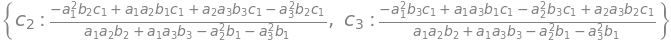

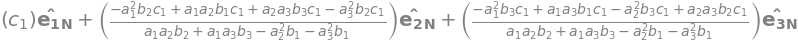

In [5]:
ai = sp.symbols("a1:4", real=True)
bi = sp.symbols("b1:4", real=True)
ci = sp.symbols("c1:4", real=True)

values = {
    ai[0]: 8,
    ai[1]: 2,
    ai[2]: -1,
    bi[0]: 3,
    bi[1]: -1,
    bi[2]: -3,
}

a = create_vector(N, *ai)
b = create_vector(N, *bi)
c = create_vector(N, *ci)

eqn1 = sp.Eq(a.dot(c), 0)  # Orthogonal
eqn2 = sp.Eq(c.dot(a.cross(b)), 0)  # Coplanar

result = sp.solve([eqn1, eqn2], ci[1:3])
display(result)  # general solution
display(c.subs(result))  # specific solution

vec_a = a.subs(values)
vec_b = b.subs(values)
vec_c = c.subs(result).subs(values)

# All vectors satisfying condition with c_1 free variable
display(vec_c)

assert vec_c.dot(vec_a) == 0, "c and a not orthogonal"
assert vec_c.dot(vec_a.cross(vec_b)) == 0, "c, a and b not coplanar"
